EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Los datos se leen en un dataframe maestro, y al final del EDA, se exportan distintos csv para la creacion de la base de datos SQL

In [3]:
df_maestro=pd.read_excel(r"C:\Users\Fernando\Desktop\Analisis-de-data-internet-en-Argentina\Dataset original\Internet.xlsx",sheet_name=None) #Leemos todas las hojas del excel en un diccionario de dataframes
type(df_maestro)

dict

In [4]:
df_maestro

{'Acc_vel_loc_sinrangos':          Provincia      Partido                           Localidad  \
 0     BUENOS AIRES   25 de Mayo                          25 de Mayo   
 1     BUENOS AIRES   25 de Mayo                     Agustín Mosconi   
 2     BUENOS AIRES   25 de Mayo                           Del Valle   
 3     BUENOS AIRES   25 de Mayo                           Ernestina   
 4     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   
 ...            ...          ...                                 ...   
 3061       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   
 3062       TUCUMAN      Trancas                San Pedro de Colalao   
 3063       TUCUMAN      Trancas                   Villa  de Trancas   
 3064       TUCUMAN  Yerba Buena                       Villa Carmela   
 3065       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   
 
      Link Indec  Otros  0,256 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  \
 0       6854100    NaN      

Como primeras ideas para el dashboard en power BI, se me ocurre revisar: 
- la relación entre las tecnologias predominantes por provincia y las velocidades promedio
- la relacion entre el acceso a internet y crecimiento o caída de ciertas tecnologias a lo largo del tiempo
- Penetración del internet en la población por regiones y su obvia relación con el desarrollo y la economía

Así que para tal objetivo, primero sacaremos los dataframes necesarios.

KPI´s:

Se proponen 3:

- Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre
- Medir los crecimientos de los ingresos generados por los servicios de internet y esperar un 2% trimestral

In [5]:
penetracion_poblacion=df_maestro['Penetración-poblacion'] #Empezamos nuestro EDA con estos 3 dataframes y vamos agregando conforme vayamos necesitando
penetracion_hogares=df_maestro['Penetracion-hogares']
penetracion_total=df_maestro["Penetracion-totales"]
velocidad_provincia=df_maestro["Velocidad % por prov"]
accesos_tecnologia=df_maestro["Accesos Por Tecnología"]
accesos_dial_baf=df_maestro["Dial-BAf"]
ingresos=df_maestro["Ingresos"]

Idea:
Las tablas de SQL pueden ser una de provincias con su Id, otra de partidas y otra de localidades, esta última con un Id de Provincia y Partida.

Otra tabla mas enfocada al cambio a lo largo del tiempo, con una columna del año, trimestre, provincia o la unidad de organización necesaria, e información como penetración por hogar y habitantes, velocidad promedio, totales de accesos, etc.

Así como tabla maestra de las tecnologías para asignarles un Id


**Penetración población**

In [6]:
penetracion_poblacion.info() #sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [7]:
penetracion_poblacion.describe() #nuestros datos van del 2014 al 2023, o sea 10 años de datos

,Año,Trimestre,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,15.394079
std,2.873778,1.118617,9.168959
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.750000,8.764189
50%,2018.500000,2.500000,13.417453
75%,2021.000000,3.250000,19.657928
max,2023.000000,4.000000,52.236739


In [8]:
promedio_accesos_habitante=penetracion_poblacion.groupby("Provincia")["Accesos por cada 100 hab"].mean().reset_index()
print(promedio_accesos_habitante)
promedio_accesos_habitante_anual=penetracion_poblacion.groupby("Año")["Accesos por cada 100 hab"].mean().reset_index()
promedio_accesos_habitante_anual

              Provincia  Accesos por cada 100 hab
0          Buenos Aires                 21.289629
1       Capital Federal                 46.083416
2             Catamarca                 10.130311
3                 Chaco                  9.206406
4                Chubut                 17.232239
5            Corrientes                  9.814617
6               Córdoba                 21.204449
7            Entre Ríos                 15.766444
8               Formosa                  7.074527
9                 Jujuy                  9.743484
10             La Pampa                 24.373473
11             La Rioja                 12.327633
12              Mendoza                 10.804444
13             Misiones                 10.206337
14              Neuquén                 19.062541
15            Río Negro                 16.946857
16                Salta                 10.517363
17             San Juan                  8.963649
18             San Luis                 14.167316


,Año,Accesos por cada 100 hab
0,2014,11.057695
1,2015,11.726770
2,2016,11.935179
3,2017,12.929861
4,2018,14.538694
5,2019,16.006368
6,2020,16.657562
7,2021,18.338900
8,2022,20.054660
9,2023,20.695104


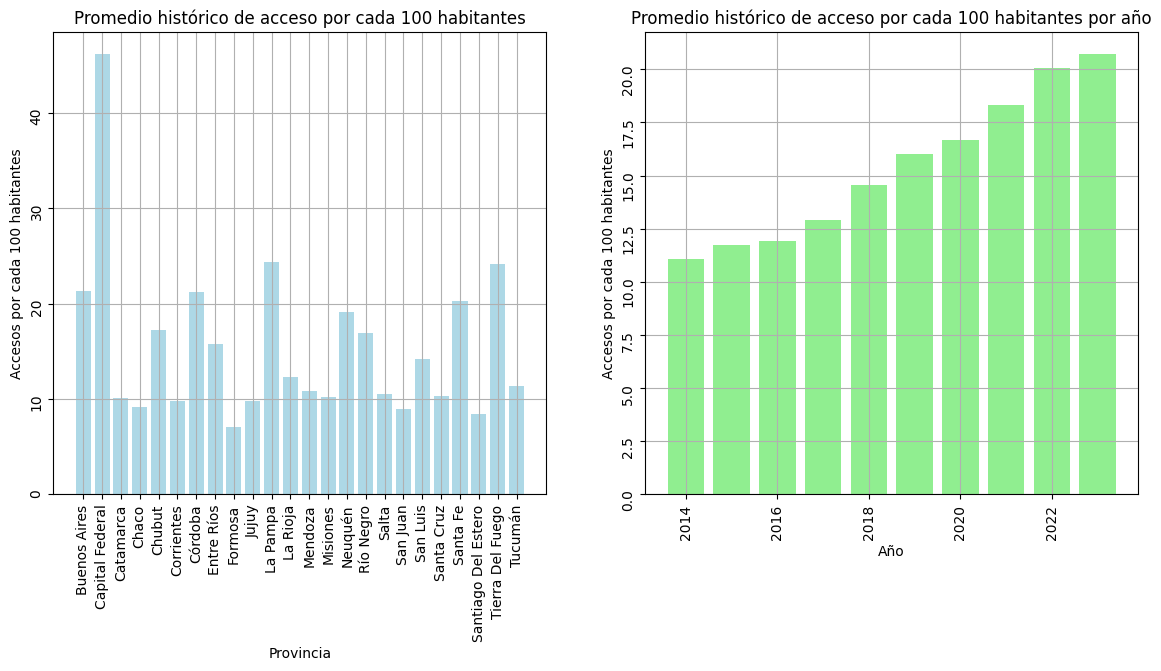

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Promedio accesos por cada 100 habitantes vs Provincia
ax1.bar(promedio_accesos_habitante["Provincia"], promedio_accesos_habitante["Accesos por cada 100 hab"], color='lightblue')
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos por cada 100 habitantes')
ax1.set_title('Promedio histórico de acceso por cada 100 habitantes')
ax1.tick_params(rotation=90)
ax1.grid(True)

# Promedio accesos por cada 100 habitantes vs Año
ax2.bar(promedio_accesos_habitante_anual["Año"], promedio_accesos_habitante_anual["Accesos por cada 100 hab"], color='lightgreen')
ax2.set_xlabel('Año')
ax2.set_ylabel('Accesos por cada 100 habitantes')
ax2.set_title('Promedio histórico de acceso por cada 100 habitantes por año')
ax2.tick_params(rotation=90)
ax2.grid(True)
plt.show()

Se nota una clara ventaja en el alcance de la población a internet en el área de la capital, así como un aumento al acceso con el tiempo en el país

**Penetracion hogares**

In [10]:
penetracion_hogares.info() #sin nulos una vez mas y con el tipo de dato correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [11]:
penetracion_hogares.describe() #de nuevo 10 años de datos

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405
std,2.873778,1.118617,23.898192
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.856870
50%,2018.500000,2.500000,48.817167
75%,2021.000000,3.250000,65.116858
max,2023.000000,4.000000,124.061394


In [12]:
promedio_accesos_hogar=penetracion_hogares.groupby("Provincia")["Accesos por cada 100 hogares"].mean().reset_index()
print(promedio_accesos_habitante)
promedio_accesos_hogar_anual=penetracion_hogares.groupby("Año")["Accesos por cada 100 hogares"].mean().reset_index()
promedio_accesos_hogar_anual

              Provincia  Accesos por cada 100 hab
0          Buenos Aires                 21.289629
1       Capital Federal                 46.083416
2             Catamarca                 10.130311
3                 Chaco                  9.206406
4                Chubut                 17.232239
5            Corrientes                  9.814617
6               Córdoba                 21.204449
7            Entre Ríos                 15.766444
8               Formosa                  7.074527
9                 Jujuy                  9.743484
10             La Pampa                 24.373473
11             La Rioja                 12.327633
12              Mendoza                 10.804444
13             Misiones                 10.206337
14              Neuquén                 19.062541
15            Río Negro                 16.946857
16                Salta                 10.517363
17             San Juan                  8.963649
18             San Luis                 14.167316


,Año,Accesos por cada 100 hogares
0,2014,36.891846
1,2015,39.198153
2,2016,39.889283
3,2017,42.525228
4,2018,48.477593
5,2019,53.666356
6,2020,56.130637
7,2021,61.978518
8,2022,67.823625
9,2023,70.042812


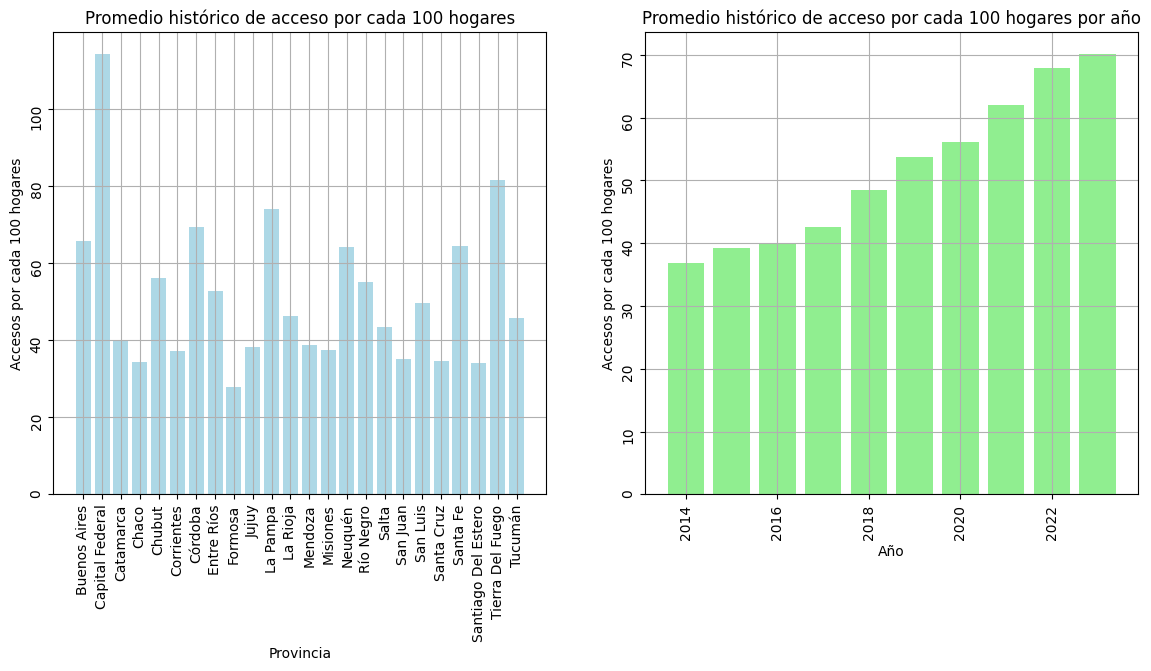

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Promedio accesos por cada 100 hogares vs Provincia
ax1.bar(promedio_accesos_hogar["Provincia"], promedio_accesos_hogar["Accesos por cada 100 hogares"], color='lightblue')
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos por cada 100 hogares')
ax1.set_title('Promedio histórico de acceso por cada 100 hogares')
ax1.tick_params(rotation=90)
ax1.grid(True)

# Promedio accesos por cada 100 hogares vs Año
ax2.bar(promedio_accesos_hogar_anual["Año"], promedio_accesos_hogar_anual["Accesos por cada 100 hogares"], color='lightgreen')
ax2.set_xlabel('Año')
ax2.set_ylabel('Accesos por cada 100 hogares')
ax2.set_title('Promedio histórico de acceso por cada 100 hogares por año')
ax2.tick_params(rotation=90)
ax2.grid(True)
plt.show()

Vemos que capital federal tiene mas de 1 acceso por hogar, se puede deber a distintas redes en un mismo lugar

**Penetración total**


In [14]:
penetracion_total.info() #info trimestral de 10 años sin faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [15]:
penetracion_total.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,40.000000,40.000000,40.000000,40.000000
mean,2018.500000,2.500000,62.436404,19.319330
std,2.908872,1.132277,9.563500,3.134956
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.750000,53.636190,16.471345
50%,2018.500000,2.500000,61.947487,19.138953
75%,2021.000000,3.250000,69.574850,21.656592
max,2023.000000,4.000000,78.560000,24.660000


In [16]:
acceso_anual_hogares=penetracion_total.groupby("Año")["Accesos por cada 100 hogares"].mean().reset_index()
print(acceso_anual_hogares)
acceso_anual_habitantes=penetracion_total.groupby("Año")["Accesos por cada 100 hab"].mean().reset_index()
acceso_anual_habitantes

    Año  Accesos por cada 100 hogares
0  2014                     50.144852
1  2015                     52.053712
2  2016                     53.214464
3  2017                     55.936220
4  2018                     60.021969
5  2019                     63.929266
6  2020                     65.249676
7  2021                     70.235327
8  2022                     75.923557
9  2023                     77.655000


,Año,Accesos por cada 100 hab
0,2014,15.259364
1,2015,15.916863
2,2016,16.335457
3,2017,17.207378
4,2018,18.515000
5,2019,19.779117
6,2020,20.250465
7,2021,21.867256
8,2022,23.717403
9,2023,24.345000


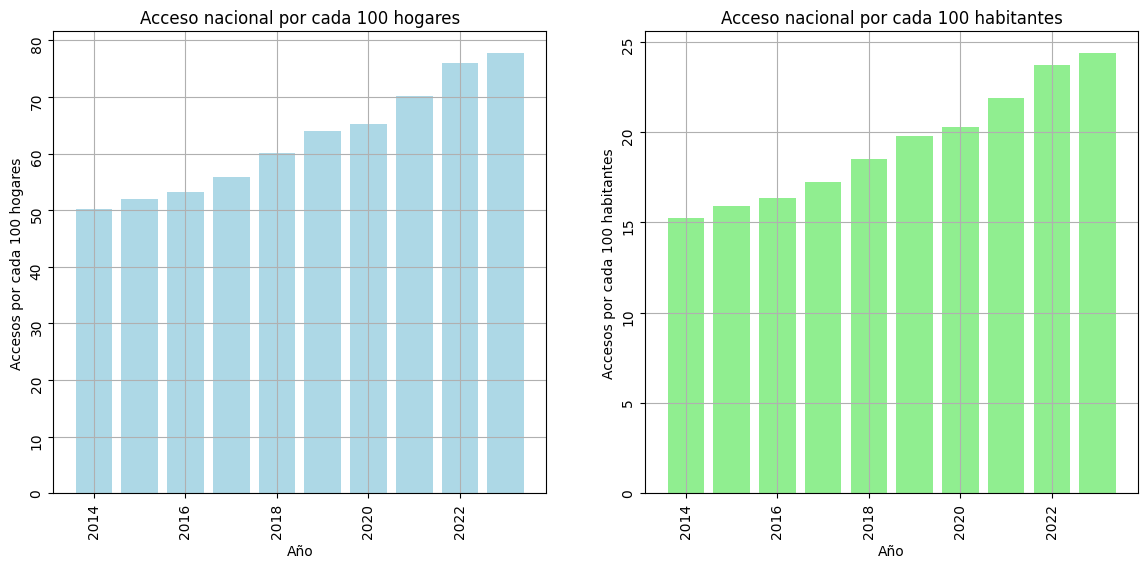

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Promedio accesos por cada 100 hogares anual a nivel nacional
ax1.bar(acceso_anual_hogares["Año"], acceso_anual_hogares["Accesos por cada 100 hogares"], color='lightblue')
ax1.set_xlabel('Año')
ax1.set_ylabel('Accesos por cada 100 hogares')
ax1.set_title('Acceso nacional por cada 100 hogares')
ax1.tick_params(rotation=90)
ax1.grid(True)

# Promedio accesos por cada 100 hogares anual a nivel nacional 
ax2.bar(acceso_anual_habitantes["Año"], acceso_anual_habitantes["Accesos por cada 100 hab"], color='lightgreen')
ax2.set_xlabel('Año')
ax2.set_ylabel('Accesos por cada 100 habitantes')
ax2.set_title('Acceso nacional por cada 100 habitantes')
ax2.tick_params(rotation=90)
ax2.grid(True)
plt.show()

**Velocidad provincia**

In [18]:
velocidad_provincia.info() #sin nulos de nuevo :))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [19]:
velocidad_provincia.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,21.615685
std,2.873778,1.118617,29.340345
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.685122
50%,2018.500000,2.500000,8.885746
75%,2021.000000,3.250000,25.682270
max,2023.000000,4.000000,234.440000


In [20]:
velocidad_provincia_promedio=velocidad_provincia.groupby("Provincia")["Mbps (Media de bajada)"].mean().reset_index()
print(velocidad_provincia_promedio)

              Provincia  Mbps (Media de bajada)
0          Buenos Aires               38.288382
1       Capital Federal               54.924554
2             Catamarca               26.607139
3                 Chaco               29.216435
4                Chubut                7.549799
5            Corrientes               25.633339
6               Córdoba               31.024234
7            Entre Ríos               23.953189
8               Formosa               20.289402
9                 Jujuy               15.634952
10             La Pampa                8.374273
11             La Rioja               18.636903
12              Mendoza               12.931953
13             Misiones               25.568672
14              Neuquén               27.734964
15            Río Negro               20.147938
16                Salta               22.503633
17             San Juan                7.724481
18             San Luis               21.405508
19           Santa Cruz                7

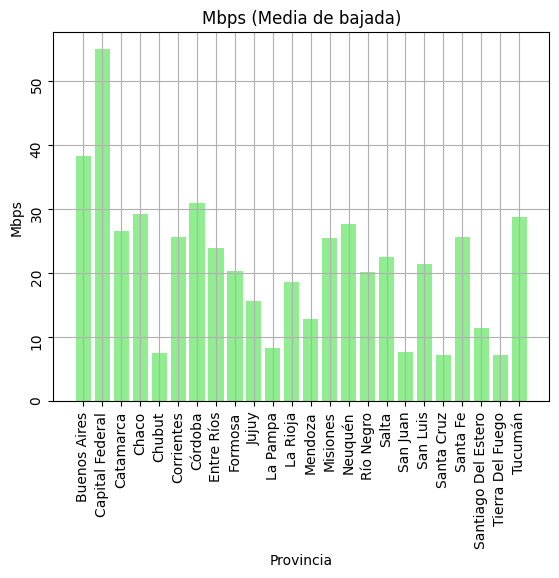

In [21]:
fig,ax=plt.subplots()
ax.bar(velocidad_provincia_promedio["Provincia"],velocidad_provincia_promedio["Mbps (Media de bajada)"],color="lightgreen")
ax.set_xlabel("Provincia")
ax.set_ylabel("Mbps")
ax.set_title("Mbps (Media de bajada)")
ax.tick_params(rotation=90)
ax.grid()
plt.show()

De nuevo, Buenos Aires y Capital con la mejor velocidad

**Ingresos**

In [22]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [23]:
ingresos.describe() #tenemos como valor maximo 2033, lo tomaré como error de input y se corregira a 2023

,Año,Trimestre,Ingresos (miles de pesos)
count,40.000000,40.000000,4.000000e+01
mean,2018.750000,2.500000,3.281153e+07
std,3.642696,1.132277,3.850304e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.817891e+06
50%,2018.500000,2.500000,1.842255e+07
75%,2021.000000,3.250000,3.942974e+07
max,2033.000000,4.000000,1.673760e+08


In [24]:
#Igualmente borraremos la columna Periodo que es redundante con trimestre
ingresos.replace({"Año":{2033:2023}},inplace=True)
ingresos.drop("Periodo",axis=1, inplace=True)
ingresos

,Año,Trimestre,Ingresos (miles de pesos)
0,2023,4,1.673760e+08
1,2023,3,1.331066e+08
2,2023,2,1.180603e+08
3,2023,1,1.041350e+08
4,2022,4,7.244348e+07
5,2022,3,6.408678e+07
6,2022,2,6.041950e+07
7,2022,1,5.521931e+07
8,2021,4,4.546789e+07
9,2021,3,4.299994e+07


In [25]:
#convertiremos la columna Ingresos (miles de pesos) en millones de pesos 
ingresos["Ingresos en millones de pesos"]=ingresos["Ingresos (miles de pesos)"]/1000
ingresos.drop("Ingresos (miles de pesos)",axis=1,inplace=True)
ingresos

,Año,Trimestre,Ingresos en millones de pesos
0,2023,4,167376.014800
1,2023,3,133106.593410
2,2023,2,118060.280280
3,2023,1,104134.992810
4,2022,4,72443.482989
5,2022,3,64086.784331
6,2022,2,60419.500623
7,2022,1,55219.313015
8,2021,4,45467.887165
9,2021,3,42999.944293


In [26]:
ingresos_anual=ingresos.groupby("Año")["Ingresos en millones de pesos"].sum().reset_index()
ingresos_anual

,Año,Ingresos en millones de pesos
0,2014,13683.948936
1,2015,20108.814125
2,2016,26867.507416
3,2017,39671.973600
4,2018,59539.593973
5,2019,86772.530609
6,2020,127585.839691
7,2021,163383.869454
8,2022,252169.080958
9,2023,522677.881300


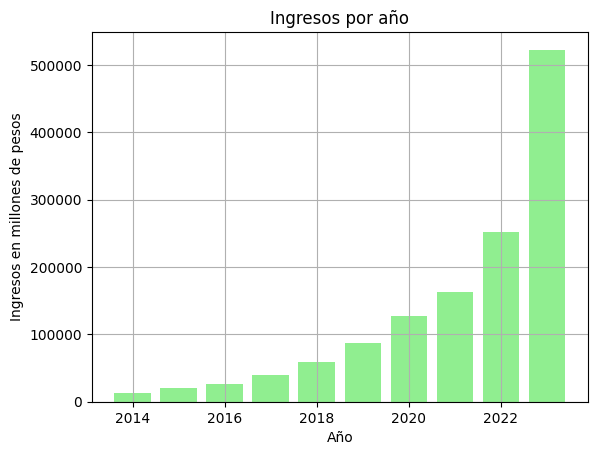

In [27]:
fig,ax=plt.subplots()
ax.bar(ingresos_anual["Año"],ingresos_anual["Ingresos en millones de pesos"],color="lightgreen")
ax.set_xlabel("Año")
ax.set_ylabel("Ingresos en millones de pesos")
ax.set_title("Ingresos por año")
ax.grid()
plt.show()

Aumento increíble en los ultimos 3 años

**Accesos por tecnología**

In [28]:
accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB


**Accesos Dial-Baf**

In [29]:
accesos_dial_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               960 non-null    int64  
 1   Trimestre         960 non-null    int64  
 2   Provincia         960 non-null    object 
 3   Banda ancha fija  960 non-null    int64  
 4   Dial up           958 non-null    float64
 5   Total             960 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB


**Ambas tienen una estructura igual y son tecnología de conectividad, así que para simplificar las vamos a hacer en una sola tabla**

In [30]:
tecnologias=accesos_tecnologia
tecnologias[["BAF","Dial"]]=accesos_dial_baf[["Banda ancha fija","Dial up"]]
tecnologias

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,BAF,Dial
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0,5005720.0,5900.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0,1472317.0,2050.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0,74586.0,1.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0,147381.0,5.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0,169313.0,857.0
...,...,...,...,...,...,...,...,...,...,...,...
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,37124.0,9.0
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,27272.0,766.0
959,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0,129944.0,88.0
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Vemos que recogió 2 filas sin datos, así que dropeamos esas 2 filas
# al igual que total para recalcularlo con las nuevas tecnologias 
tecnologias.drop("Total",axis=1,inplace=True)
tecnologias=tecnologias.iloc[:960,:]

In [32]:
tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    object 
 1   Trimestre     960 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   BAF           960 non-null    float64
 9   Dial          958 non-null    float64
dtypes: float64(7), object(3)
memory usage: 75.1+ KB


In [33]:
tecnologias.loc[:,"Total"]=tecnologias.iloc[:,3:10].sum(axis=1)
tecnologias

C:\Users\Fernando\AppData\Local\Temp\ipykernel_9412\2126254922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tecnologias.loc[:,"Total"]=tecnologias.iloc[:,3:10].sum(axis=1)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,BAF,Dial,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5005720.0,5900.0,10023240.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1472317.0,2050.0,2948734.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74586.0,1.0,149174.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147381.0,5.0,294772.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,169313.0,857.0,340340.0
...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26304.0,460.0,53528.0
956,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506000.0,612.0,1013224.0
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37124.0,9.0,74266.0
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,27272.0,766.0,56076.0


In [34]:
tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    object 
 1   Trimestre     960 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   BAF           960 non-null    float64
 9   Dial          958 non-null    float64
 10  Total         960 non-null    float64
dtypes: float64(8), object(3)
memory usage: 82.6+ KB


In [35]:
tecnologias.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,BAF,Dial,Total
count,9.600000e+02,9.600000e+02,9.600000e+02,960.00000,960.000000,9.600000e+02,958.000000,9.600000e+02
mean,1.171007e+05,1.816350e+05,4.428212e+04,12071.28750,6451.996875,3.606255e+05,917.538622,7.230823e+05
std,2.411026e+05,4.461057e+05,1.681546e+05,20544.30774,11192.518329,7.761374e+05,2311.474721,1.555791e+06
min,3.296000e+03,0.000000e+00,0.000000e+00,0.00000,2.000000,1.219300e+04,0.000000,2.511400e+04
25%,2.123025e+04,1.054450e+04,3.470000e+02,676.00000,330.000000,5.892325e+04,5.000000,1.180005e+05
50%,4.547550e+04,3.967000e+04,2.541000e+03,4947.00000,1881.000000,1.104735e+05,137.000000,2.222770e+05
75%,9.190500e+04,7.549325e+04,2.347675e+04,13694.25000,7278.750000,1.883502e+05,618.750000,3.767035e+05
max,1.586343e+06,2.797700e+06,1.784593e+06,138405.00000,73415.000000,5.005720e+06,15229.000000,1.002324e+07


In [36]:
tecnologias.loc[:,'mayoria']=tecnologias[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'BAF', 'Dial']].idxmax(axis=1)
tecnologias['mayoria'].value_counts()

C:\Users\Fernando\AppData\Local\Temp\ipykernel_9412\984311960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tecnologias.loc[:,'mayoria']=tecnologias[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'BAF', 'Dial']].idxmax(axis=1)


mayoria
BAF    960
Name: count, dtype: int64

**Correlaciones**

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
velocidad_provincia['prov']=le.fit_transform(velocidad_provincia['Provincia'])
velocidad_provincia


,Año,Trimestre,Provincia,Mbps (Media de bajada),prov
0,2023,4,Buenos Aires,158.490000,0
1,2023,4,Capital Federal,234.440000,1
2,2023,4,Catamarca,89.400000,2
3,2023,4,Chaco,107.140000,3
4,2023,4,Chubut,20.290000,4
...,...,...,...,...,...
955,2014,1,Santa Cruz,3.315991,19
956,2014,1,Santa Fe,3.147407,20
957,2014,1,Santiago Del Estero,2.949472,21
958,2014,1,Tierra Del Fuego,3.446888,22


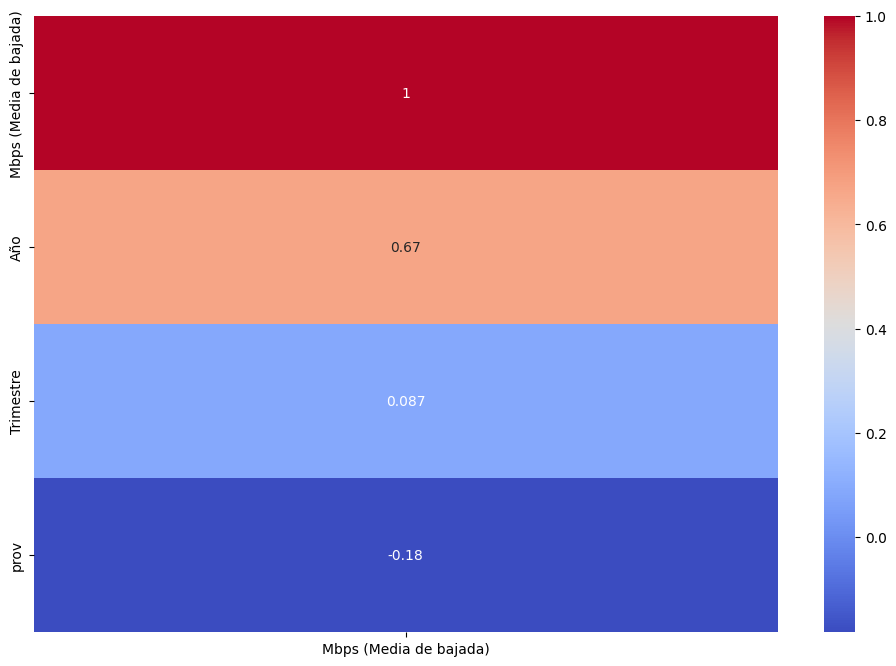

In [38]:
corr=velocidad_provincia.drop('Provincia',axis=1).corr()[['Mbps (Media de bajada)']].sort_values('Mbps (Media de bajada)',ascending=False) 

import seaborn as sns
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')  
plt.show()



El tiempo es la variable con mayor correlacion con el aumento de la velocidad, mostrando casi una necesidad de ir aumentando anio con anio

La evolucion del proyecto aumenta un nuevo dataframe, para que haya tablas sql de evolucion por provincia, partido y localidad.
Contendran un ID, el lugar, el anio, trimestre, velocidad promedio para ese periodo, posiblemente la tecnologia que predomina en ese lugar.

In [39]:
tecnologias

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,BAF,Dial,Total,mayoria
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5005720.0,5900.0,10023240.0,BAF
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1472317.0,2050.0,2948734.0,BAF
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74586.0,1.0,149174.0,BAF
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147381.0,5.0,294772.0,BAF
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,169313.0,857.0,340340.0,BAF
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26304.0,460.0,53528.0,BAF
956,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506000.0,612.0,1013224.0,BAF
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37124.0,9.0,74266.0,BAF
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,27272.0,766.0,56076.0,BAF


In [40]:
tec_localidad=df_maestro['Accesos_tecnologia_localidad']
tec_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7242,0,0,0,0,7242
3072,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3073,TUCUMAN,Trancas,Villa de Trancas,90112030,102,0,0,0,33,0,0,71,206
3074,TUCUMAN,Yerba Buena,Villa Carmela,90119020,831,0,0,0,1,0,0,79,911


In [41]:
tec_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3076 non-null   object
 1   Partido        3076 non-null   object
 2   Localidad      3076 non-null   object
 3   Link Indec     3076 non-null   object
 4   ADSL           3076 non-null   int64 
 5   CABLEMODEM     3076 non-null   int64 
 6   DIAL UP        3076 non-null   int64 
 7   FIBRA OPTICA   3076 non-null   int64 
 8   OTROS          3076 non-null   int64 
 9   SATELITAL      3076 non-null   int64 
 10  WIMAX          3076 non-null   int64 
 11  WIRELESS       3076 non-null   int64 
 12  Total general  3076 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 312.5+ KB


In [42]:
tec_localidad.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3076.000000,3.076000e+03,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3.076000e+03
mean,271.908322,1.957910e+03,3.833875,1270.540637,57.809818,0.972692,0.711313,190.429129,3.754116e+03
std,1550.899791,2.315212e+04,43.153830,8467.801469,793.944335,13.648046,15.093030,712.357143,3.119100e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+01
50%,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,1.675000e+02
75%,78.250000,8.500000e+00,0.000000,152.000000,0.000000,1.000000,0.000000,127.000000,1.048250e+03
max,58700.000000,1.198835e+06,2050.000000,269623.000000,27703.000000,742.000000,444.000000,19906.000000,1.474367e+06


**Exportación de datasets a csv para la base de datos SQL**

In [ ]:
#tecnologias.to_csv("tecnologias")
#ingresos.to_csv("ingresos")
#penetracion_poblacion.to_csv("penetracion_poblacion")
#penetracion_hogares.to_csv("penetracion_hogares")
#penetracion_total.to_csv("penetracion_total")
#velocidad_provincia.to_csv("velocidad_provincia")
#tec_localidad.to_csv('tec_localidad')